# Imports and constants

In [28]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

In [2]:
# Paths
lipid_path = 'data/lba_all_pixels_fully_abamapped11062023.h5'

# Loading dataset

In [3]:
# Loading the dataset
lipids = pd.read_hdf(lipid_path)

In [4]:
lipids_exponential = lipids.copy()

# Fill in background pixels and exponential (the data we imported were logged, you can play with both scales)
lipids_exponential = lipids_exponential.fillna(-9.21)
lipids_exponential.iloc[:,3:205] = np.exp(lipids_exponential.iloc[:,3:205].values)

In [5]:
# Select section 12
section_12 = lipids_exponential.loc[lipids['Section'] == 12]

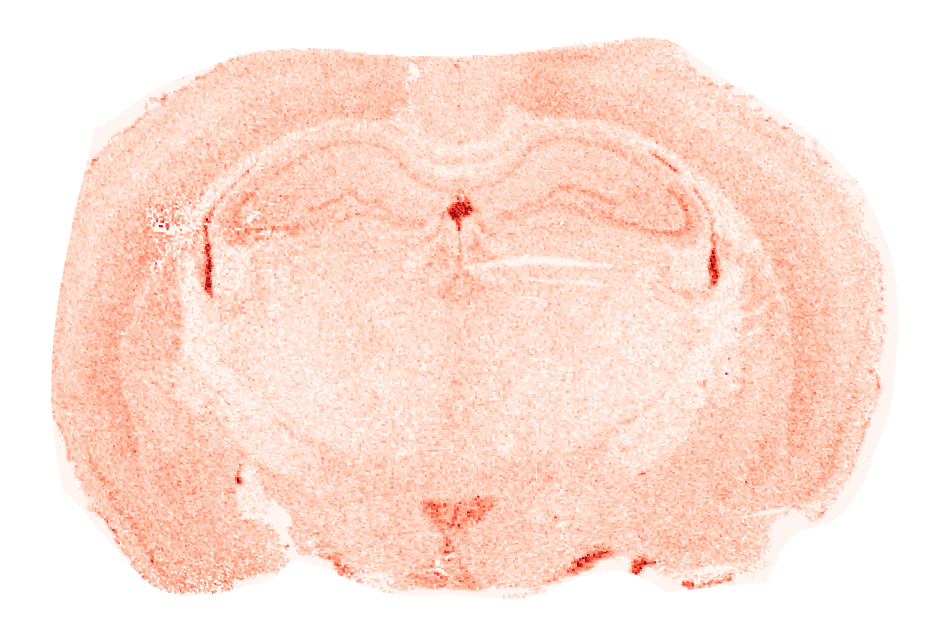

In [6]:
# Plot a single lipid
plt.figure(figsize=(12, 8))

dot_size = 1.5

sc1 = plt.scatter(section_12['z_ccf'], - section_12['y_ccf'], c=section_12['SHexCer 38:1;3'], s=dot_size, cmap="Reds", alpha=1)

plt.axis('off')
plt.show()

# note the large black contour is just a matrix from the experiment and not the brain, you should remove it

# Data exploration

In [7]:
# Head
print(section_12.head())

                          x_ccf     y_ccf     z_ccf  LPC O-16:2  LPC 16:0_dup  \
section12_pixel23_121  7.621452  0.312450  7.882461    0.000140      0.000112   
section12_pixel23_122  7.621452  0.313953  7.859683    0.000213      0.000112   
section12_pixel23_123  7.621452  0.315503  7.837031    0.000154      0.000100   
section12_pixel23_124  7.621452  0.317101  7.814505    0.000147      0.000113   
section12_pixel23_125  7.621452  0.318745  7.792104    0.000229      0.000112   

                       LPC O- 18:3  LPC O-18:2  LPC O-16:2_dup  LPC 15:1  \
section12_pixel23_121     0.000116    0.000125        0.000214  0.000100   
section12_pixel23_122     0.000114    0.000125        0.000204  0.000162   
section12_pixel23_123     0.000117    0.000134        0.000195  0.000151   
section12_pixel23_124     0.000114    0.000136        0.000229  0.000154   
section12_pixel23_125     0.000115    0.000206        0.000100  0.000100   

                       LPC 18:1  ...  PG(42:6)   Hex2Cer

In [8]:
# Info on the dataset
print(section_12.info())

<class 'pandas.core.frame.DataFrame'>
Index: 94747 entries, section12_pixel23_121 to section12_pixel308_161
Columns: 208 entries, x_ccf to y
dtypes: float32(3), float64(202), int64(3)
memory usage: 152.0+ MB
None


In [9]:
# Statistics
print(section_12.describe())

              x_ccf         y_ccf         z_ccf    LPC O-16:2  LPC 16:0_dup  \
count  94747.000000  94747.000000  94747.000000  94747.000000  94747.000000   
mean       7.621452      3.890388      5.834257      0.001170      0.000497   
std        0.003200      1.918976      2.687550      0.000514      0.000207   
min        7.621452      0.312450      0.865772      0.000100      0.000100   
25%        7.621452      2.233024      3.519835      0.000826      0.000357   
50%        7.621452      3.885575      5.827421      0.001152      0.000471   
75%        7.621452      5.545235      8.144789      0.001482      0.000608   
max        7.621452      7.438256     10.872088      0.004125      0.003632   

        LPC O- 18:3    LPC O-18:2  LPC O-16:2_dup      LPC 15:1      LPC 18:1  \
count  94747.000000  94747.000000    94747.000000  94747.000000  94747.000000   
mean       0.000601      0.000510        0.000458      0.001122      0.000503   
std        0.000219      0.000173        0.00

In [10]:
# x_cff is a constant value, because we are considering one section
np.min(section_12['x_ccf'])
np.max(section_12['x_ccf'])

7.6214518547058105

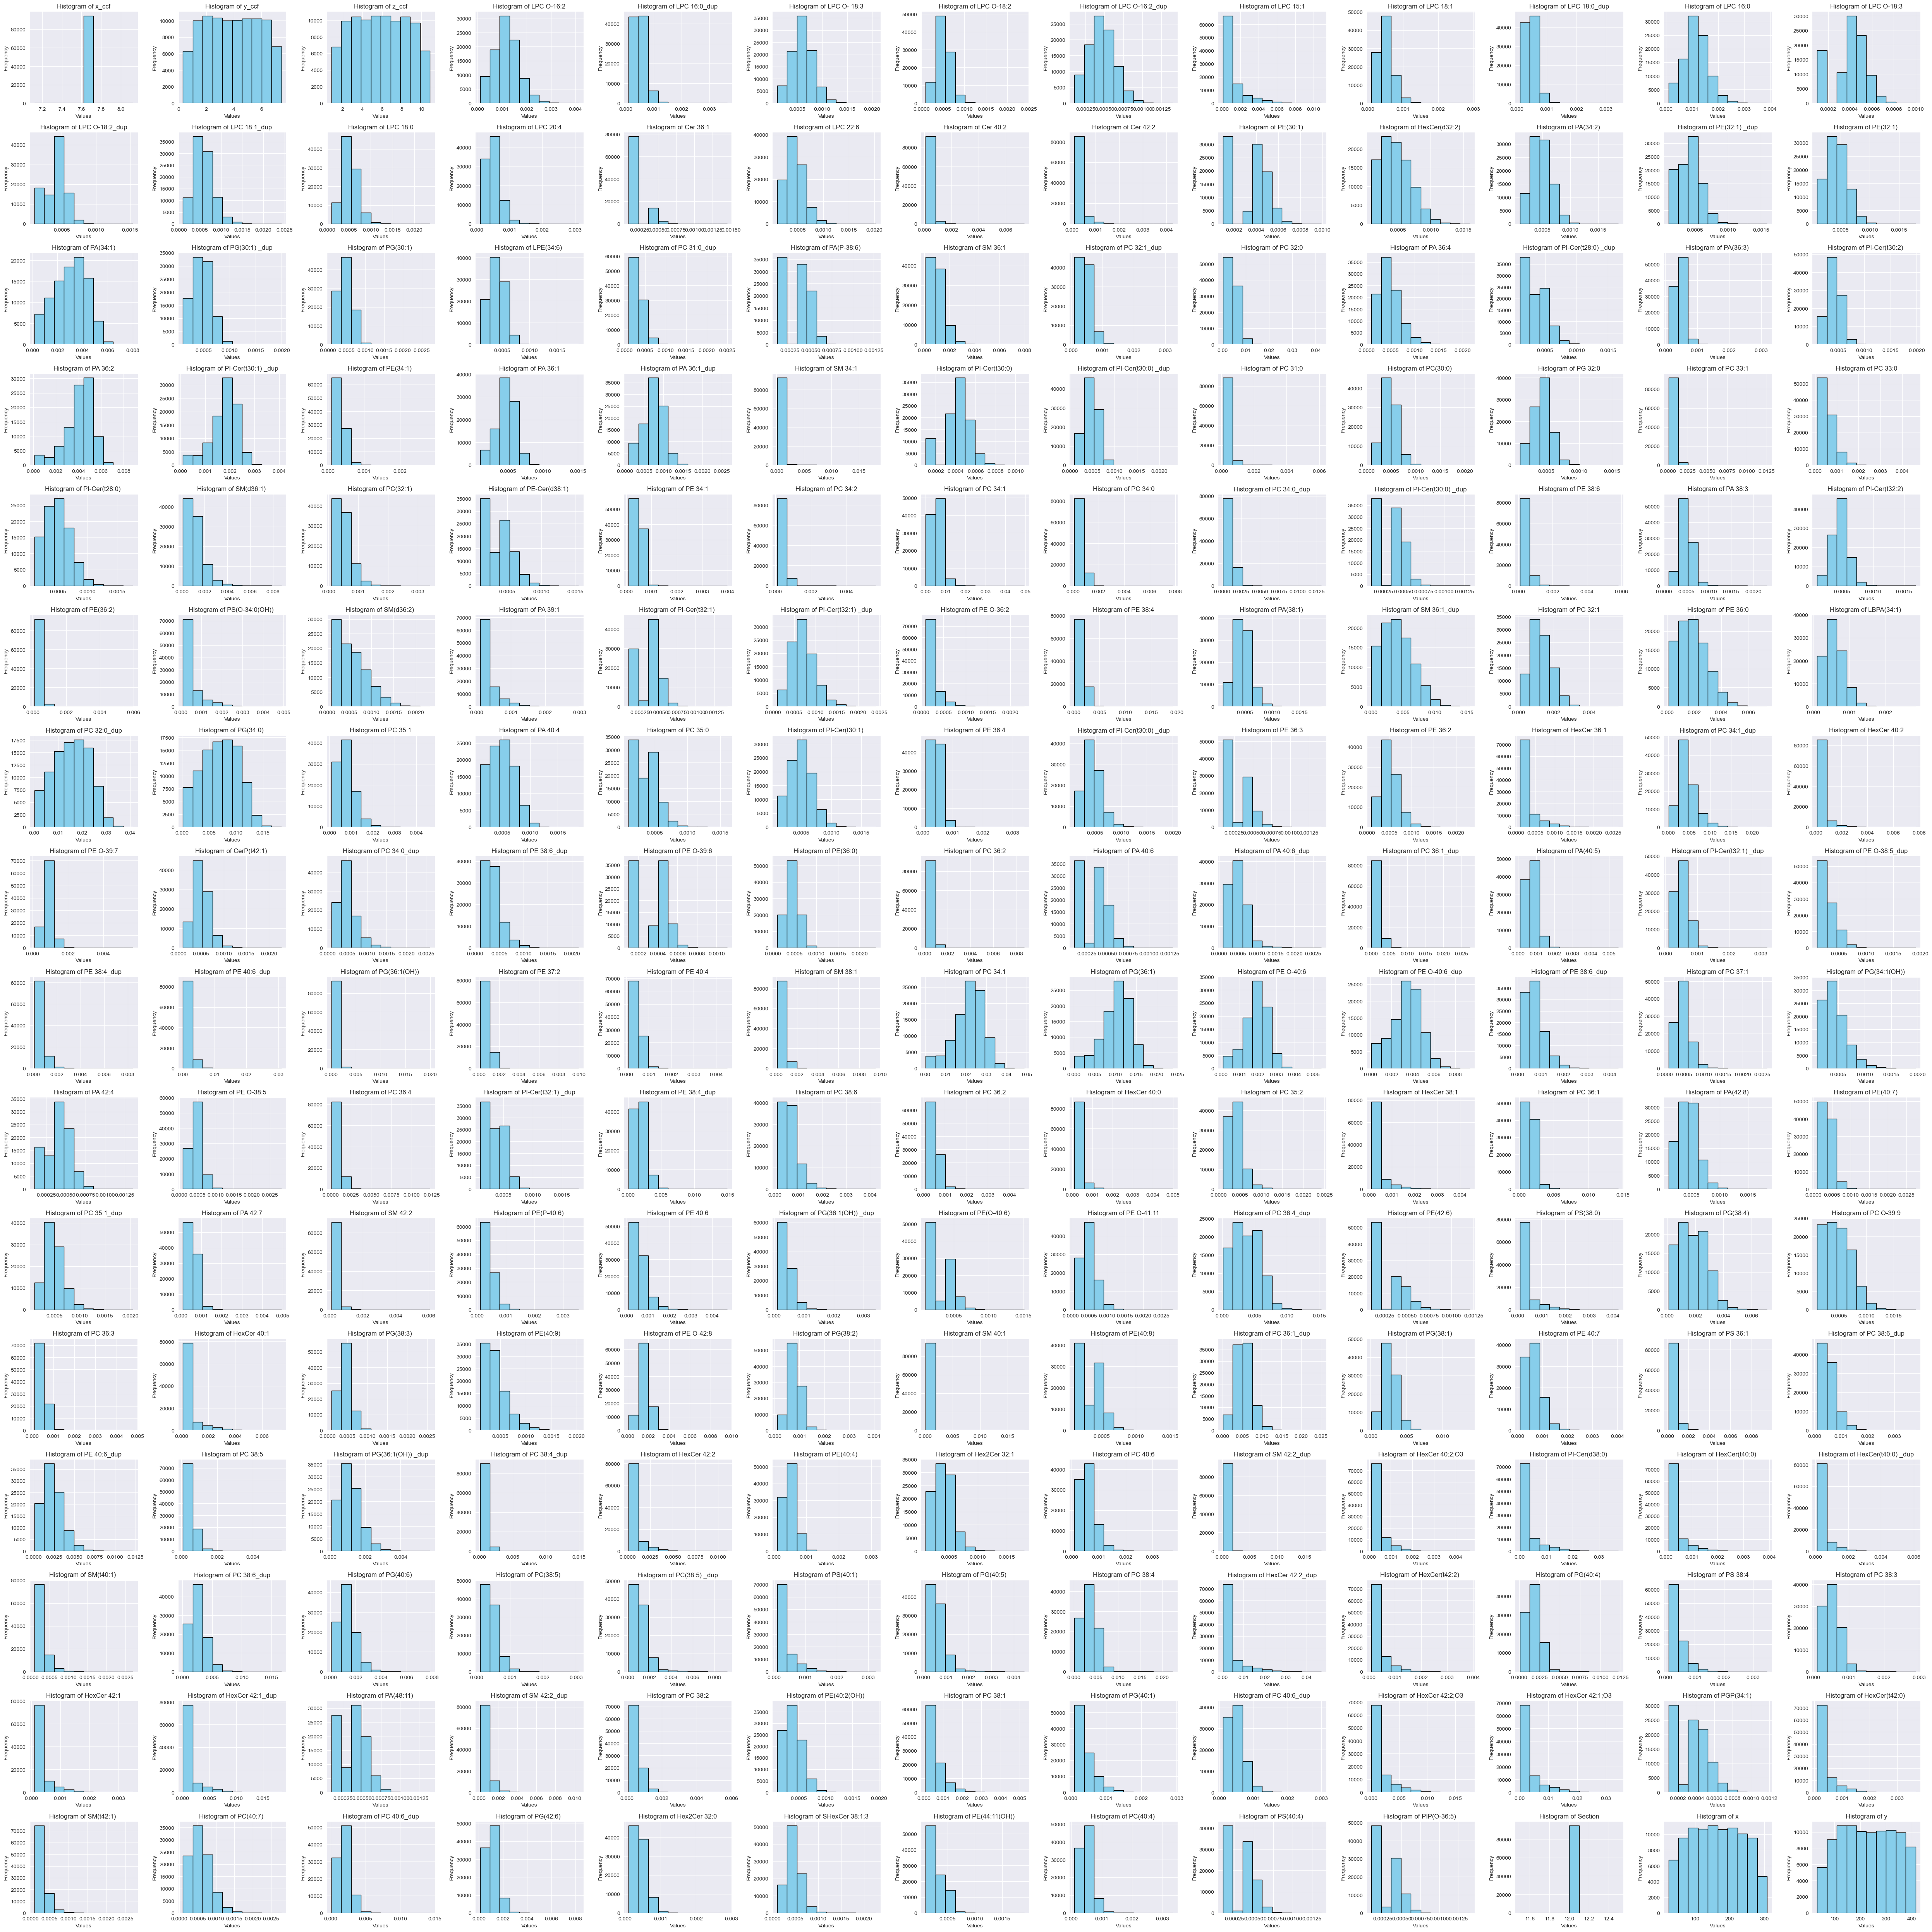

In [24]:
rows = 16
columns = 13

assert rows * columns <= 208

fig, ax = plt.subplots(rows, columns, figsize=(50, 50))

for i in range(rows):
    for j in range(columns):
        assert i * columns + j < 208
        data = section_12.iloc[:, i * columns + j].values
        ax[i, j].hist(data, bins=10, color='skyblue', edgecolor='black')
        ax[i, j].set_xlabel('Values')
        ax[i, j].set_ylabel('Frequency')
        ax[i, j].set_title(f'Histogram of {section_12.columns.values[i * columns + j]}')

plt.tight_layout()

# Correlation

In [20]:
# Compute the Pearson correlation coefficient and p-value
for i in range(208):
    for j in range(i + 1, 208):
        corr_coefficient, p_value = pearsonr(section_12.iloc[:, i], section_12.iloc[:, j])

        # Bonferroni correction
        p_value *= 200

        # Check if the correlation is statistically significant (using a common significance level of 0.05)
        if p_value < 0.05:
            print("The Pearson correlation is statistically significant.")
            print(section_12.columns.values[i], section_12.columns.values[j])

/Users/violarenne/opt/anaconda3/envs/ml-project-2-genelipids/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


The Pearson correlation is statistically significant.
y_ccf z_ccf
The Pearson correlation is statistically significant.
y_ccf LPC O-16:2
The Pearson correlation is statistically significant.
y_ccf LPC 16:0_dup
The Pearson correlation is statistically significant.
y_ccf LPC O- 18:3
The Pearson correlation is statistically significant.
y_ccf LPC O-18:2
The Pearson correlation is statistically significant.
y_ccf LPC O-16:2_dup
The Pearson correlation is statistically significant.
y_ccf LPC 15:1
The Pearson correlation is statistically significant.
y_ccf LPC 18:1
The Pearson correlation is statistically significant.
y_ccf LPC 16:0
The Pearson correlation is statistically significant.
y_ccf LPC O-18:3
The Pearson correlation is statistically significant.
y_ccf LPC O-18:2_dup
The Pearson correlation is statistically significant.
y_ccf LPC 18:1_dup
The Pearson correlation is statistically significant.
y_ccf LPC 18:0
The Pearson correlation is statistically significant.
y_ccf Cer 36:1
The Pear

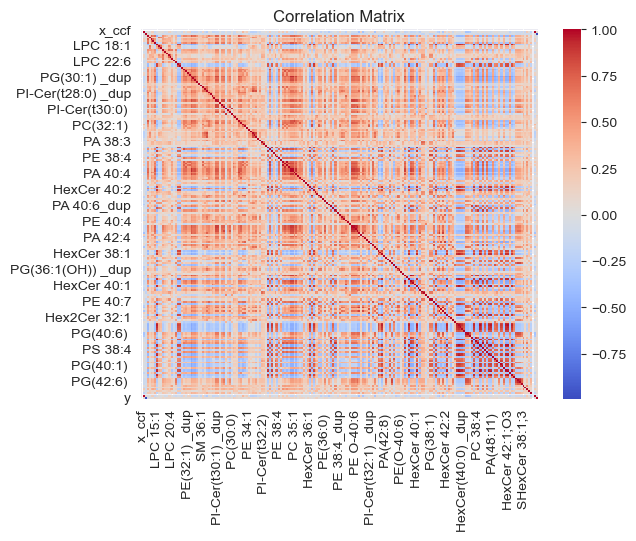

x_ccf     y_ccf     z_ccf  LPC O-16:2  LPC 16:0_dup  \
x_ccf           NaN       NaN       NaN         NaN           NaN   
y_ccf           NaN  1.000000 -0.028935    0.032011     -0.039456   
z_ccf           NaN -0.028935  1.000000    0.071327     -0.023709   
LPC O-16:2      NaN  0.032011  0.071327    1.000000      0.224103   
LPC 16:0_dup    NaN -0.039456 -0.023709    0.224103      1.000000   
...             ...       ...       ...         ...           ...   
PS(40:4)        NaN  0.034402 -0.092227   -0.008282      0.151910   
PIP(O-36:5)     NaN -0.216672 -0.073324    0.227696      0.214408   
Section         NaN       NaN       NaN         NaN           NaN   
x               NaN  0.996665  0.014345    0.047338     -0.038485   
y               NaN  0.053844 -0.994805   -0.062731      0.027140   

              LPC O- 18:3  LPC O-18:2  LPC O-16:2_dup  LPC 15:1  LPC 18:1  \
x_ccf                 NaN         NaN             NaN       NaN       NaN   
y_ccf            0.167191    0.176296       -0.145294 -0.052811  0.063106   
z_ccf            0.057807    0.037078       -0.107499 -0.066566 -0.043429   
LPC O-16:2       0.760562    0.630197        0.697154 -0.448111 -0.090669   
LPC 16:0_dup     0.208440    0.192512        0.151801 -0.003942  0.680324   
...                   ...         ...             ...       ...       ...   
PS(40:4)         0.102525    0.117152        0.054117  0.255717  0.238254   
PIP(O-36:5)      0.120791    0.081566        0.305015 -0.215269  0.033359   
Section               NaN         NaN             NaN       NaN       NaN   
x                0.167747    0.175140       -0.142520 -0.071877  0.048648   
y               -0.047798   -0.027248        0.106861  0.063803  0.045865   

              ...  PG(42:6)   Hex2Cer 32:0  SHexCer 38:1;3  PE(44:11(OH))   \
x_ccf         ...        NaN           NaN             NaN             NaN   
y_ccf         ...  -0.118958     -0.133180        0.042365       -0.164488   
z_ccf         ...  -0.110750     -0.068268       -0.096476       -0.083976   
LPC O-16:2    ...   0.383312      0.273253        0.312641        0.068669   
LPC 16:0_dup  ...   0.183571      0.153306        0.120961        0.132044   
...           ...        ...           ...             ...             ...   
PS(40:4)      ...  -0.012540     -0.032394        0.153760        0.146052   
PIP(O-36:5)   ...   0.349270      0.282444        0.189722        0.120558   
Section       ...        NaN           NaN             NaN             NaN   
x             ...  -0.131851     -0.144706        0.039270       -0.167851   
y             ...   0.105984      0.063263        0.096192        0.079370   

              PC(40:4)   PS(40:4)   PIP(O-36:5)   Section         x         y  
x_ccf               NaN        NaN           NaN      NaN       NaN       NaN  
y_ccf          0.207793   0.034402     -0.216672      NaN  0.996665  0.053844  
z_ccf         -0.100082  -0.092227     -0.073324      NaN  0.014345 -0.994805  
LPC O-16:2     0.357985  -0.008282      0.227696      NaN  0.047338 -0.062731  
LPC 16:0_dup   0.108315   0.151910      0.214408      NaN -0.038485  0.027140  
...                 ...        ...           ...      ...       ...       ...  
PS(40:4)       0.186726   1.000000      0.047652      NaN  0.022950  0.090562  
PIP(O-36:5)    0.123314   0.047652      1.000000      NaN -0.217341  0.067636  
Section             NaN        NaN           NaN      NaN       NaN       NaN  
x              0.200038   0.022950     -0.217341      NaN  1.000000  0.013672  
y              0.102698   0.090562      0.067636      NaN  0.013672  1.000000  

[208 rows x 208 columns]

In [37]:
# Example: Correlation matrix
correlation_matrix = section_12.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

correlation_matrix

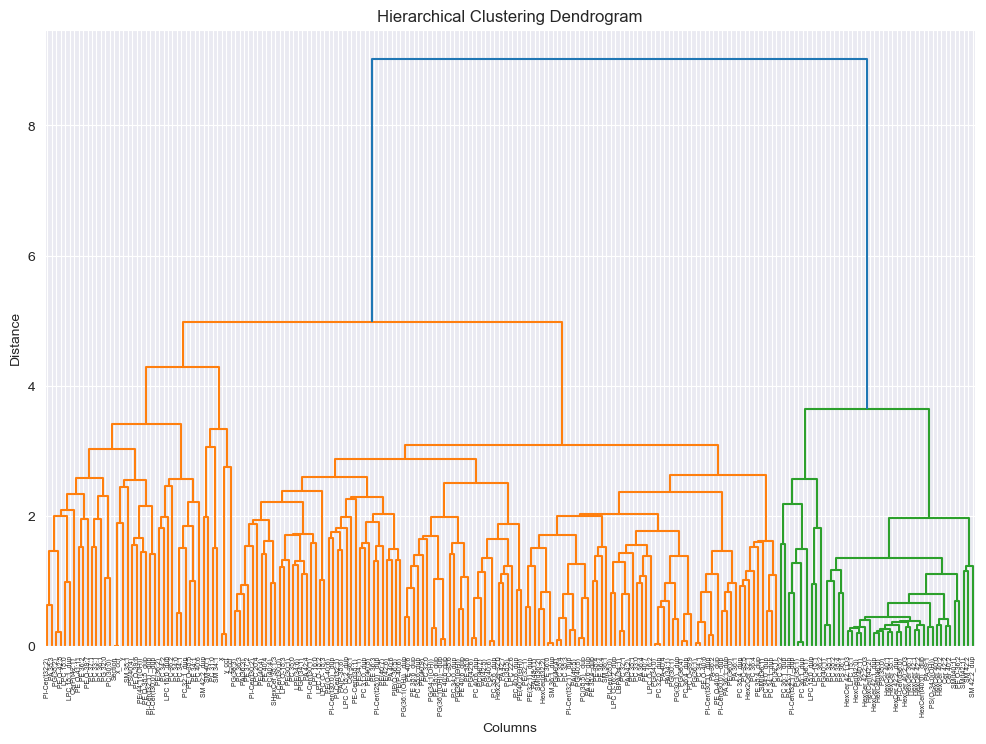

In [32]:
correlation_matrix = np.nan_to_num(correlation_matrix)

# Perform hierarchical clustering
linkage_matrix = hierarchy.linkage(correlation_matrix, method='average')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram = hierarchy.dendrogram(linkage_matrix, labels=section_12.columns, orientation='top', distance_sort='descending')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Columns')
plt.ylabel('Distance')
plt.show()

In [39]:
# Cut the dendrogram to obtain clusters
threshold = 2  # Adjust the threshold as needed
clusters = hierarchy.fcluster(linkage_matrix, t=threshold, criterion='distance')

# Create a dictionary to store columns for each cluster
cluster_columns = {}

# Iterate through columns and their corresponding cluster labels
for col, cluster_label in zip(section_12.columns, clusters):
    if cluster_label not in cluster_columns:
        cluster_columns[cluster_label] = []
    cluster_columns[cluster_label].append(col)

# Print or use the list of columns in each cluster
for cluster_label, columns in cluster_columns.items():
    print(f"Cluster {cluster_label} columns: {columns}")

Cluster 29 columns: ['x_ccf', 'Section', 'y']
Cluster 19 columns: ['y_ccf', 'x']
Cluster 20 columns: ['z_ccf']
Cluster 7 columns: ['LPC O-16:2', 'LPC O-16:2_dup', 'PA(34:2)\xa0', 'PA(34:1)', 'PG(30:1)\xa0_dup', 'PG(30:1)\xa0', 'PA 36:4', 'PC 33:0', 'PI-Cer(t28:0)\xa0', 'PC 32:1', 'LBPA(34:1)\xa0', 'PC 32:0_dup', 'PG(34:0)\xa0', 'PC 35:1', 'PA 40:4', 'PC 36:4_dup', 'PG(38:4)\xa0', 'PC O-39:9', 'PE 40:7']
Cluster 25 columns: ['LPC 16:0_dup', 'PC 34:2', 'PE(36:2)\xa0']
Cluster 16 columns: ['LPC O- 18:3', 'LPC O-18:2']
Cluster 1 columns: ['LPC 15:1', 'Cer 40:2', 'Cer 42:2', 'PS(O-34:0(OH))\xa0', 'PA 39:1', 'PE O-36:2', 'HexCer 36:1', 'HexCer 40:2', 'HexCer 40:0', 'HexCer 38:1', 'SM 42:2', 'PS(38:0)\xa0', 'HexCer 40:1', 'PS 36:1', 'HexCer 42:2', 'HexCer 40:2;O3', 'PI-Cer(d38:0)\xa0', 'HexCer(t40:0)\xa0', 'HexCer(t40:0)\xa0_dup', 'SM(t40:1)\xa0', 'PS(40:1)\xa0', 'HexCer 42:2_dup', 'HexCer(t42:2)\xa0', 'PS 38:4', 'HexCer 42:1', 'HexCer 42:1_dup', 'SM 42:2_dup', 'PC 38:2', 'PC 38:1', 'PG(40:1)